In [1]:
# Import library that needed for colab
import os
import cv2
import zipfile
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from google.colab import drive

import random
from shutil import copyfile

import numpy as np
from keras.preprocessing import image
from google.colab import files

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Set Permission for kaggle
!chmod 600 /content/kaggle.json

In [3]:
# Downloading the datasets using kaggle API

! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables

# Dataset : https://www.kaggle.com/datasets/raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables

 99% 1.40G/1.41G [00:08<00:00, 195MB/s]
100% 1.41G/1.41G [00:09<00:00, 168MB/s]


In [4]:
zip_file = zipfile.ZipFile('/content/fresh-and-stale-images-of-fruits-and-vegetables.zip')
zip_file.extractall('/tmp/bahan/')

In [5]:
!ls "/tmp/bahan/"

fresh_apple	    fresh_orange     stale_banana	 stale_tomato
fresh_banana	    fresh_tomato     stale_bitter_gourd
fresh_bitter_gourd  ImageLabels.txt  stale_capsicum
fresh_capsicum	    stale_apple      stale_orange


In [ ]:
#drive.mount('/content/drive')

In [ ]:
# Salin dataset ke google drive
#!cp -av "/tmp/train" "/content/drive/My Drive/Colab Notebooks/dataset"

In [ ]:
#!ls '/content/drive/My Drive/Colab Notebooks/Latihan'

In [6]:
os.mkdir('/tmp/train/')
os.mkdir('/tmp/train/fresh_apple')
os.mkdir('/tmp/train/fresh_banana')
os.mkdir('/tmp/train/fresh_bitter_gourd')
os.mkdir('/tmp/train/fresh_capsicum')
os.mkdir('/tmp/train/fresh_orange')
os.mkdir('/tmp/train/fresh_tomato')
os.mkdir('/tmp/train/stale_apple')
os.mkdir('/tmp/train/stale_banana')
os.mkdir('/tmp/train/stale_bitter_gourd')
os.mkdir('/tmp/train/stale_capsicum')
os.mkdir('/tmp/train/stale_orange')
os.mkdir('/tmp/train/stale_tomato')
os.mkdir('/tmp/validasi/')
os.mkdir('/tmp/validasi/fresh_apple')
os.mkdir('/tmp/validasi/fresh_banana')
os.mkdir('/tmp/validasi/fresh_bitter_gourd')
os.mkdir('/tmp/validasi/fresh_capsicum')
os.mkdir('/tmp/validasi/fresh_orange')
os.mkdir('/tmp/validasi/fresh_tomato')
os.mkdir('/tmp/validasi/stale_apple')
os.mkdir('/tmp/validasi/stale_banana')
os.mkdir('/tmp/validasi/stale_bitter_gourd')
os.mkdir('/tmp/validasi/stale_capsicum')
os.mkdir('/tmp/validasi/stale_orange')
os.mkdir('/tmp/validasi/stale_tomato')


In [7]:
#base_dir = '/content/drive/My Drive/Colab Notebooks/Latihan'
base_dir = '/tmp/'
bahan_dir = os.path.join(base_dir, 'bahan/')
train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'validasi/')

In [8]:
# Directory with our bahan apple pictures
bahan_fresh_apple_dir = os.path.join(bahan_dir, 'fresh_apple/')
bahan_stale_apple_dir = os.path.join(bahan_dir, 'stale_apple/')

# Directory with our bahan banana pictures
bahan_fresh_banana_dir = os.path.join(bahan_dir, 'fresh_banana/')
bahan_stale_banana_dir = os.path.join(bahan_dir, 'stale_banana/')

# Directory with our bahan bitter gourd pictures
bahan_fresh_bitter_gourd_dir = os.path.join(bahan_dir, 'fresh_bitter_gourd/')
bahan_stale_bitter_gourd_dir = os.path.join(bahan_dir, 'stale_bitter_gourd/')

# Directory with our bahan capsicum pictures
bahan_fresh_capsicum_dir = os.path.join(bahan_dir, 'fresh_capsicum/')
bahan_stale_capsicum_dir = os.path.join(bahan_dir, 'stale_capsicum/')

# Directory with our bahan orage pictures
bahan_fresh_orange_dir = os.path.join(bahan_dir, 'fresh_orange/')
bahan_stale_orange_dir = os.path.join(bahan_dir, 'stale_orange/')

# Directory with our bahan tomato pictures
bahan_fresh_tomato_dir = os.path.join(bahan_dir, 'fresh_tomato/')
bahan_stale_tomato_dir = os.path.join(bahan_dir, 'stale_tomato/')

# melihat jumplah data train pada setiap folder
print("Jumplah gambar fresh  apple : ", len(os.listdir(bahan_fresh_apple_dir)))
print("Jumplah gambar stale  apple : ", len(os.listdir(bahan_stale_apple_dir)))

print("Jumplah gambar fresh  banana : ", len(os.listdir(bahan_fresh_banana_dir)))
print("Jumplah gambar stale  banana : ", len(os.listdir(bahan_stale_banana_dir)))

print("Jumplah gambar fresh  bitter gourd : ", len(os.listdir(bahan_fresh_bitter_gourd_dir)))
print("Jumplah gambar stale  bitter gourd : ", len(os.listdir(bahan_stale_bitter_gourd_dir)))

print("Jumplah gambar fresh  capsicum : ", len(os.listdir(bahan_fresh_capsicum_dir)))
print("Jumplah gambar stale  capsicum : ", len(os.listdir(bahan_stale_capsicum_dir)))

print("Jumplah gambar fresh  orange : ", len(os.listdir(bahan_fresh_orange_dir)))
print("Jumplah gambar stale  orange : ", len(os.listdir(bahan_stale_orange_dir)))

print("Jumplah gambar fresh  tomato : ", len(os.listdir(bahan_fresh_tomato_dir)))
print("Jumplah gambar stale  tomato : ", len(os.listdir(bahan_stale_tomato_dir)))

Jumplah gambar fresh  apple :  1693
Jumplah gambar stale  apple :  2342
Jumplah gambar fresh  banana :  1581
Jumplah gambar stale  banana :  1467
Jumplah gambar fresh  bitter gourd :  327
Jumplah gambar stale  bitter gourd :  357
Jumplah gambar fresh  capsicum :  990
Jumplah gambar stale  capsicum :  901
Jumplah gambar fresh  orange :  1466
Jumplah gambar stale  orange :  1595
Jumplah gambar fresh  tomato :  981
Jumplah gambar stale  tomato :  982


In [9]:
# Directory with our training apple pictures
train_fresh_apple_dir = os.path.join(train_dir, 'fresh_apple/')
train_stale_apple_dir = os.path.join(train_dir, 'stale_apple/')

# Directory with our training banana pictures
train_fresh_banana_dir = os.path.join(train_dir, 'fresh_banana/')
train_stale_banana_dir = os.path.join(train_dir, 'stale_banana/')

# Directory with our training bitter gourd pictures
train_fresh_bitter_gourd_dir = os.path.join(train_dir, 'fresh_bitter_gourd/')
train_stale_bitter_gourd_dir = os.path.join(train_dir, 'stale_bitter_gourd/')

# Directory with our training capsicum pictures
train_fresh_capsicum_dir = os.path.join(train_dir, 'fresh_capsicum/')
train_stale_capsicum_dir = os.path.join(train_dir, 'stale_capsicum/')

# Directory with our training orage pictures
train_fresh_orange_dir = os.path.join(train_dir, 'fresh_orange/')
train_stale_orange_dir = os.path.join(train_dir, 'stale_orange/')

# Directory with our training tomato pictures
train_fresh_tomato_dir = os.path.join(train_dir, 'fresh_tomato/')
train_stale_tomato_dir = os.path.join(train_dir, 'stale_tomato/')


# Directory with our validation apple pictures
validation_fresh_apple_dir = os.path.join(validation_dir, 'fresh_apple/')
validation_stale_apple_dir = os.path.join(validation_dir, 'stale_apple/')

# Directory with our validation banana pictures
validation_fresh_banana_dir = os.path.join(validation_dir, 'fresh_banana/')
validation_stale_banana_dir = os.path.join(validation_dir, 'stale_banana/')

# Directory with our validation bitter gourd pictures
validation_fresh_bitter_gourd_dir = os.path.join(validation_dir, 'fresh_bitter_gourd/')
validation_stale_bitter_gourd_dir = os.path.join(validation_dir, 'stale_bitter_gourd/')

# Directory with our validation capsicum pictures
validation_fresh_capsicum_dir = os.path.join(validation_dir, 'fresh_capsicum/')
validation_stale_capsicum_dir = os.path.join(validation_dir, 'stale_capsicum/')

# Directory with our validation orage pictures
validation_fresh_orange_dir = os.path.join(validation_dir, 'fresh_orange/')
validation_stale_orange_dir = os.path.join(validation_dir, 'stale_orange/')

# Directory with our validation tomato pictures
validation_fresh_tomato_dir = os.path.join(validation_dir, 'fresh_tomato/')
validation_stale_tomato_dir = os.path.join(validation_dir, 'stale_tomato/')


In [10]:
def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file =  source + i
    destination =  train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

# Jumplah pembagian data training dan testing
train_ratio = 0.9

# Pembagian Training dan Validasi
# Training
source_00 = bahan_fresh_apple_dir
train_00 = train_fresh_apple_dir
validation_00 = validation_fresh_apple_dir
train_val_split(source_00, train_00, validation_00, train_ratio)

source_01 = bahan_fresh_banana_dir
train_01 = train_fresh_banana_dir
validation_01 = validation_fresh_banana_dir
train_val_split(source_01, train_01, validation_01, train_ratio)

source_02 = bahan_fresh_bitter_gourd_dir
train_02 = train_fresh_bitter_gourd_dir
validation_02 = validation_fresh_bitter_gourd_dir
train_val_split(source_02, train_02, validation_02, train_ratio)

source_03 = bahan_fresh_capsicum_dir
train_03 = train_fresh_capsicum_dir
validation_03 = validation_fresh_capsicum_dir
train_val_split(source_03, train_03, validation_03, train_ratio)

source_04 = bahan_fresh_orange_dir
train_04 = train_fresh_orange_dir
validation_04 = validation_fresh_orange_dir
train_val_split(source_04, train_04, validation_04, train_ratio)

source_05 = bahan_fresh_tomato_dir
train_05 = train_fresh_tomato_dir
validation_05 = validation_fresh_tomato_dir
train_val_split(source_05, train_05, validation_05, train_ratio)



# Validasi
source_06 = bahan_stale_apple_dir
train_06 = train_stale_apple_dir
validation_06 = validation_stale_apple_dir
train_val_split(source_06, train_06, validation_06, train_ratio)

source_07 = bahan_stale_banana_dir
train_07 = train_stale_banana_dir
validation_07 = validation_stale_banana_dir
train_val_split(source_07, train_07, validation_07, train_ratio)

source_08 = bahan_stale_bitter_gourd_dir
train_08 = train_stale_bitter_gourd_dir
validation_08 = validation_stale_bitter_gourd_dir
train_val_split(source_08, train_08, validation_08, train_ratio)

source_09 = bahan_stale_capsicum_dir
train_09 = train_stale_capsicum_dir
validation_09 = validation_stale_capsicum_dir
train_val_split(source_09, train_09, validation_09, train_ratio)

source_10 = bahan_stale_orange_dir
train_10 = train_stale_orange_dir
validation_10 = validation_stale_orange_dir
train_val_split(source_10, train_10, validation_10, train_ratio)

source_11 = bahan_stale_tomato_dir
train_11 = train_stale_tomato_dir
validation_11 = validation_stale_tomato_dir
train_val_split(source_11, train_11, validation_11, train_ratio)


In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 105,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (224, 224),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 13207 images belonging to 12 classes.
Found 1475 images belonging to 12 classes.


In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get("accuracy") > 0.95):
      print("\nAkurasi Mencapai 99%")
      self.model.stop_training = True

callbacks = myCallback()

In [14]:
# model = tf.keras.models.Sequential([
#                                     tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224,3)),
#                                     tf.keras.layers.MaxPooling2D(2,2),
#                                     tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
#                                     tf.keras.layers.MaxPooling2D(2,2),
#                                     tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
#                                     tf.keras.layers.MaxPooling2D(2,2),
#                                     tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(200, activation = 'relu'),
#                                     tf.keras.layers.Dropout(0.3, seed=112),
#                                     tf.keras.layers.Dense(500, activation = 'relu'),
#                                     tf.keras.layers.Dropout(0.5, seed=112),
#                                     tf.keras.layers.Dense(12, activation = 'softmax')
# ])

model = tf.keras.models.Sequential([
      # 1. convolution layer
      tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = (224,224,3)),
      tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
      # 2. convolution layer
      tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"),
      tf.keras.layers.MaxPool2D(pool_size=(3, 3)),
      # 3. convolution layer
      # tf.keras.layers.Conv2D(filters =64, kernel_size = (3,3), activation = "relu"),
      # tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units = 128, activation = "relu"),
      tf.keras.layers.Dense(units = 128, activation = "relu"),
      tf.keras.layers.Dense(units =12, activation = "sigmoid")
  ])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [16]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'],
              )



In [17]:
# checkpoint_path = '/tmp/training_1/cp.ckpt'
# checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only = True)

history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = 10,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/50
10/10 [==============================] - 61s 6s/step - loss: 2.3965 - accuracy: 0.1558 - val_loss: 2.1129 - val_accuracy: 0.3133
Epoch 2/50
10/10 [==============================] - 59s 6s/step - loss: 1.8872 - accuracy: 0.3743 - val_loss: 1.6306 - val_accuracy: 0.4433
Epoch 3/50
10/10 [==============================] - 59s 6s/step - loss: 1.5627 - accuracy: 0.4771 - val_loss: 1.3947 - val_accuracy: 0.5267
Epoch 4/50
10/10 [==============================] - 61s 6s/step - loss: 1.3492 - accuracy: 0.5276 - val_loss: 1.2602 - val_accuracy: 0.5667
Epoch 5/50
10/10 [==============================] - 59s 6s/step - loss: 1.2166 - accuracy: 0.5810 - val_loss: 1.2007 - val_accuracy: 0.5667
Epoch 6/50
10/10 [==============================] - 59s 6s/step - loss: 1.0227 - accuracy: 0.6371 - val_loss: 0.9744 - val_accuracy: 0.6900
Epoch 7/50
10/10 [==============================] - 59s 6s/step - loss: 0.9708 - accuracy: 0.6581 - val_loss: 1.0392 - val_accuracy: 0.6100
Epoch 8/50
10/10 [==

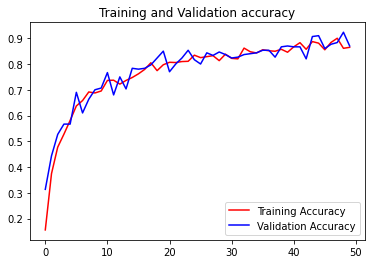

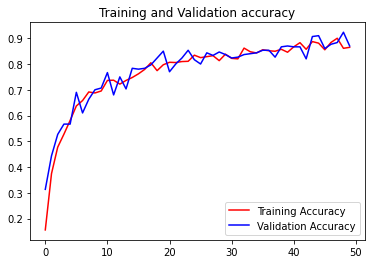

In [18]:
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc= 'best')
plt.show()

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc= 'best')
plt.show()



In [19]:
# Download history model

def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving rotated_by_15_Screen Shot 2018-06-12 at 11.26.49 PM.png to rotated_by_15_Screen Shot 2018-06-12 at 11.26.49 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.26.49 PM.png
This Image Belongs to Class stale_orange


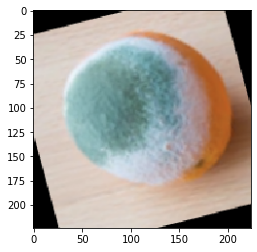

In [26]:
# Mencoba Klasifikasi

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size = (224, 224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print("This Image Belongs to Class", class_list[j-1])
      break

In [28]:
# Konversi Model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpb9_vdw85/assets
